In [1]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [2]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [22]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


##Trying to use the avocado data to get the full geography data 

In [33]:
avocado_cities=avocado_df[avocado_df.geography != 'Total U.S.']
#avocado_cities = avocado_df.drop(index= 'geography', labels=['Total U.S.', 'Baltimore/Washington', 'Buffalo/Rochester', 'California', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'Midsouth', 'New Orleans/Mobile', 'Northeast', 'Northern New England', 'Phoenix/Tucson','Raleigh/Greensboro', 'Richmond/Norfolk', 'Southeast', 'West', 'West Tex/New Mexico', 'Great Lakes', 'South Central'])
avocado_cities.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [4]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [5]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [6]:
#Merge the two dataframes together on Geography and year
merged_df = pd.merge(avocado_df,rename_income_df, on=['geography', 'year'], how='inner')
merged_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051


In [7]:
#Changing Date to ONLY reflect the month
split_cols = merged_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
new_merge = merged_df.join(split_cols)
new_merge

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income,Split-0,Split-1,Split-2
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780,2017,01,01
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,01
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780,2017,01,08
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,08
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780,2017,01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051,2019,12,15
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051,2019,12,22
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051,2019,12,22
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051,2019,12,29


In [8]:
#make it pretty
renamed_merge = new_merge.rename(columns={'Split-1':'month', 'geography':'city'})
clean_merge = renamed_merge[['month', 'year', 'city', 'average_price', 'total_volume','Per capita personal income', '4046', '4225', '4770', 'type']]
clean_merge.head()

,month,year,city,average_price,total_volume,Per capita personal income,4046,4225,4770,type
0,01,2017,Albany,1.47,129948.23,36780,4845.77,117027.41,200.36,conventional
1,01,2017,Albany,1.87,1376.70,36780,71.65,192.63,0.00,organic
2,01,2017,Albany,1.55,91728.18,36780,3355.47,75641.23,56.91,conventional
3,01,2017,Albany,1.94,2229.52,36780,63.46,478.31,0.00,organic
4,01,2017,Albany,1.55,88526.26,36780,3327.65,71956.77,607.03,conventional


In [9]:
grouped_by_city_year = pd.DataFrame(clean_merge.groupby(["city", "year"]).mean().round(2))
grouped_by_city_year

average_price  total_volume  Per capita personal income  \
city         year                                                            
Albany       2017           1.64      49354.55                    36780.00   
             2018           1.45      64017.27                    38034.00   
             2019           1.43      62896.96                    39922.00   
Columbus     2017           1.32      96605.78                    45770.00   
             2018           1.20     120479.99                    47776.00   
             2019           1.24     119954.93                    49068.67   
Jacksonville 2017           1.67      86729.13                    46548.00   
             2018           1.38     115771.86                    48349.00   
             2019           1.25     118982.09                    49473.00   
Pittsburgh   2017           1.36      64609.70                    54583.00   
             2018           1.27      82390.90                    58206.00   
             2019           1.35      74334.76                    60227.00   
Roanoke      2017           1.36      76279.36                    45414.00   
             2018           1.28     101738.09                    47092.00   
             2019           1.27     102575.37                    48374.00   
St. Louis    2017           1.59      84793.61                    52395.00   
             2018           1.45     105040.42                    55277.00   
             2019           1.53     105019.71                    56923.00   
Syracuse     2017           1.59      35207.34                    48148.00   
             2018           1.22      45978.59                    49954.00   
             2019           1.35      43962.57                    52051.00   

                       4046      4225     4770  
city         year                               
Albany       2017   1608.51  39712.43   151.47  
             2018   5076.33  47879.76    49.18  
             2019   2294.52  51627.03   135.17  
Columbus     2017  39641.19  14201.03   911.62  
             2018  32573.11  14897.04  1918.30  
             2019  29232.05  14259.52  1387.24  
Jacksonville 2017  45933.84   9123.91    78.14  
             2018  64166.16   6841.65   290.60  
             2019  46753.30   4319.44   414.81  
Pittsburgh   2017  25240.41  14500.04   901.73  
             2018  23891.79  10454.29   901.80  
             2019  19283.19   8663.25   617.11  
Roanoke      2017  18160.17  22304.47    61.21  
             2018  24548.13  21291.40   122.62  
             2019  28333.09  16018.35    65.13  
St. Louis    2017  37603.84   7014.96   102.75  
             2018  45720.26   7201.67   252.82  
             2019  46412.85   6391.72   307.27  
Syracuse     2017   1170.53  20705.19    36.31  
             2018   3300.99  22631.68    50.73  
             2019   1790.03  24367.89    46.70

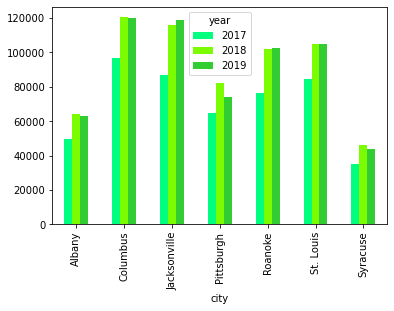

In [13]:
grouped_by_city_year['total_volume'].unstack().plot(kind='bar', color=('springgreen', 'lawngreen', 'limegreen'))
#plt.xlabel("Month by Year")
#plt.xticks(rotation=45)
#plt.ylabel("Volume of items purchased")
#plt.title("Volume over time for PLU 4046")

plt.show()